## Total Offense and Total Defense Data Frames

Upload and present dataframes of team offense and team defense rankings, points for and points against for the 2018 season.

In [39]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

# File to Load (Offense First)
file_to_load = "Data Sources/Total Offense.csv"

# Read Offense  File and store into Pandas data frame
Offense_data = pd.read_csv(file_to_load)
Offense_data.head()

,Rk,Team,G,PF,Yds,Ply,Y/P,TO,FL,1stD,...,Yds.2,TD.1,Y/A,1stD.2,Pen,Yds.3,1stPy,Sc%,TO%,EXP
0,1,Kansas City Chiefs,16,565,6810,996,6.8,18,6,384,...,1855,16,4.8,108,137,1152,37,52.6,10.5,298.14
1,2,Los Angeles Rams,16,527,6738,1060,6.4,19,7,401,...,2231,23,4.9,134,96,878,31,48.6,9.8,239.79
2,3,New Orleans Saints,16,504,6067,1010,6.0,16,9,377,...,2025,26,4.3,134,94,939,33,51.8,9.5,237.73
3,4,New England Patriots,16,436,6295,1073,5.9,18,7,365,...,2037,18,4.3,131,93,744,28,40.8,9.2,190.96
4,5,Indianapolis Colts,16,433,6179,1070,5.8,24,9,371,...,1718,13,4.2,96,120,953,38,41.2,13.2,140.47


In [40]:
# File to Load (Defense)
file_to_load = "Data Sources/Team Defense.csv"

# Read Defense File and store into Pandas data frame
Defense_data = pd.read_csv(file_to_load)
Defense_data.head()

,Rk,Tm,G,PF,Yds,Ply,Y/P,TO,FL,1stD,...,Yds.2,TD.1,Y/A,1stD.2,Pen,Yds.3,1stPy,Sc%,TO%,EXP
0,1,Chicago Bears,16,283,4795,1004,4.8,36,9,278,...,1280,5,3.8,67,114,1022,25,28.6,19.5,95.5
1,2,Baltimore Ravens,16,287,4687,974,4.8,17,5,286,...,1327,11,3.7,82,113,1017,30,29.1,9.5,39.88
2,3,Tennessee Titans,16,303,5334,1001,5.3,17,6,298,...,1863,9,4.3,98,120,984,18,33.1,9.9,-22.13
3,4,Jacksonville Jaguars,16,316,4983,970,5.1,17,6,288,...,1870,16,4.3,89,92,735,37,33.1,8.3,4.66
4,5,Houston Texans,16,316,5490,1022,5.4,29,14,298,...,1323,8,3.4,76,117,945,22,31.6,13.9,-10.29


## Build Custom Data Frames of Offense and Defense, and combine into one dataframe

In [41]:
#Offense Data Frame
Offense_DF = Offense_data[["Rk", "Team","PF","Yds"]]
Offense_DF.head()

,Rk,Team,PF,Yds
0,1,Kansas City Chiefs,565,6810
1,2,Los Angeles Rams,527,6738
2,3,New Orleans Saints,504,6067
3,4,New England Patriots,436,6295
4,5,Indianapolis Colts,433,6179


In [42]:
#Rename Column Headers
Offense_DF = Offense_DF.rename(columns={'Rk': 'Offensive Rank', "PF": "Points Scored", "Yds": "Yards Gained"})
Offense_DF.head()

,Offensive Rank,Team,Points Scored,Yards Gained
0,1,Kansas City Chiefs,565,6810
1,2,Los Angeles Rams,527,6738
2,3,New Orleans Saints,504,6067
3,4,New England Patriots,436,6295
4,5,Indianapolis Colts,433,6179


In [43]:
#Defense Data Frame
Defense_DF = Defense_data[["Rk", "Tm","PF","Yds"]]
Defense_DF.head()

,Rk,Tm,PF,Yds
0,1,Chicago Bears,283,4795
1,2,Baltimore Ravens,287,4687
2,3,Tennessee Titans,303,5334
3,4,Jacksonville Jaguars,316,4983
4,5,Houston Texans,316,5490


In [44]:
#Rename Column Headers
Defense_DF = Defense_DF.rename(columns={'Rk': 'Defensive Rank', "PF": "Points Against", "Yds": "Yards Forfeited", 'Tm': 'Team'})
Defense_DF.head()

,Defensive Rank,Team,Points Against,Yards Forfeited
0,1,Chicago Bears,283,4795
1,2,Baltimore Ravens,287,4687
2,3,Tennessee Titans,303,5334
3,4,Jacksonville Jaguars,316,4983
4,5,Houston Texans,316,5490


In [45]:
#Merge Tables for Summarized View

Combined_Rankings = pd.merge(Offense_DF, Defense_DF, on="Team", how="inner")
Combined_Rankings = Combined_Rankings[['Team', 'Offensive Rank', 'Defensive Rank']]
Combined_Rankings.head()

,Team,Offensive Rank,Defensive Rank
0,Kansas City Chiefs,1,24
1,Los Angeles Rams,2,20
2,New Orleans Saints,3,14
3,New England Patriots,4,7
4,Indianapolis Colts,5,10


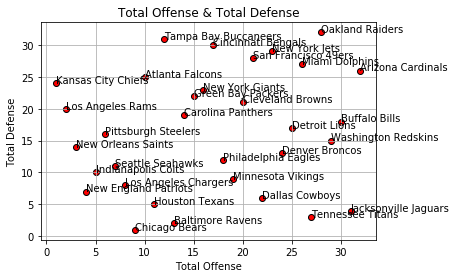

In [47]:
#Plot Total Offense and Total Defense, label each team

Combined_Rankings["Offensive Rank"] = Combined_Rankings["Offensive Rank"].astype(float)
Combined_Rankings["Defensive Rank"] = Combined_Rankings["Defensive Rank"].astype(float) 

OFF = Combined_Rankings["Offensive Rank"]
DEF = Combined_Rankings["Defensive Rank"]

plt.scatter(OFF,DEF,marker="o", facecolors="red", edgecolors="black")
plt.title("Total Offense & Total Defense")
plt.xlabel("Total Offense")
plt.ylabel("Total Defense")
plt.grid()

for i, txt in enumerate(Combined_Rankings.Team):
    plt.annotate(txt, (OFF[i], DEF[i]))
plt.savefig("Images/Efficiency_scatter.png")

In [10]:
#4th Quarter Points Surrendered

Q4_pts_file_to_load = "Data Sources/CLEAN4thquapoisur.csv"

# Read 4th Quarter Points File and store into Pandas data frame
Q4_data = pd.read_csv(Q4_pts_file_to_load)
Q4_data.head()


,Unnamed: 0,Team,2018,Last 3,Last 1,Home,Away,2017
0,0,Tennessee Titans,3.9,4.0,9,2.8,5.0,8.1
1,1,Baltimore Ravens,4.1,7.0,11,4.6,3.5,4.6
2,2,Denver Broncos,4.1,8.7,9,5.4,2.9,6.0
3,3,Houston Texans,4.2,3.0,0,2.9,5.8,6.4
4,4,New Orleans Saints,4.9,3.0,6,4.3,5.8,7.8


In [48]:
Clutch = Q4_data[["Unnamed: 0", "Team", "2018"]]
Clutch.head()

,Unnamed: 0,Team,2018
0,0,Tennessee Titans,3.9
1,1,Baltimore Ravens,4.1
2,2,Denver Broncos,4.1
3,3,Houston Texans,4.2
4,4,New Orleans Saints,4.9


In [49]:
#2nd Half Points Surrendered
SecHlf_pts_file_to_load = "Data Sources/Second Half Points Surrendered.csv"

# Read Second Half Points File and store into Pandas data frame
SecHlf_data = pd.read_csv(SecHlf_pts_file_to_load)
Second_Half = SecHlf_data[["Rank", "Team", "2018"]] 
Second_Half.head()



,Rank,Team,2018
0,1,Baltimore,7.2
1,2,Tennessee,7.8
2,3,Buffalo,8.9
3,4,Denver,9.2
4,5,New Orleans,9.3


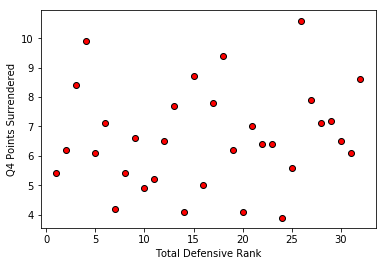

In [51]:
#idea of the chart works, the data labels do to work yet

Win_Time = Clutch["2018"]
plt.scatter(DEF,Win_Time,marker="o", facecolors="red", edgecolors="black")

plt.xlabel("Total Defensive Rank")
plt.ylabel("Q4 Points Surrendered")
plt.savefig("Images/Defense_Fourth Quarter.png")
plt.show()

In [14]:
#add total defense and total ofense, divide by two, see what their win total is against their combined value, 
#could that change when including covering the spread?

## All 2018 Games

In [15]:
All_2018 = "Data Sources/2018_Results_New.csv"

# All2018 Results and store into Pandas data frame
NFL = pd.read_csv(All_2018)

NFL.head()

,Rank,Week,Day,Date,Time,Winner/tie,Loser/tie,PtsW,PtsL,YdsW,TOW,YdsL,TOL
0,1,1,Thu,6-Sep,8:20PM,Philadelphia Eagles,Atlanta Falcons,18,12,232,2,299,1
1,2,1,Sun,9-Sep,1:00PM,Miami Dolphins,Tennessee Titans,27,20,342,2,336,3
2,3,1,Sun,9-Sep,1:00PM,Pittsburgh Steelers,Cleveland Browns,21,21,472,6,327,1
3,4,1,Sun,9-Sep,1:00PM,New England Patriots,Houston Texans,27,20,389,3,325,2
4,5,1,Sun,9-Sep,1:00PM,Minnesota Vikings,San Francisco 49ers,24,16,343,1,327,4


In [16]:
spread_upload = "Data Sources\cleaned_spreads_final.csv"
spread = pd.read_csv(spread_upload)
spread.head()

,Unnamed: 0,Rank,FAVORITE,SPREAD,UNDERDOG,TOTAL,AWAY MONEY LINE,HOME MONEY LINE,H/A
0,0,1,Atlanta Falcons,-1.0,Philadelphia Eagles,44.5,-105,-105,A
1,1,2,Tennessee Titans,-1.0,Miami Dolphins,43.5,-102,-108,A
2,2,5,Minnesota Vikings,-6.0,San Francisco 49ers,46.5,240,-260,H
3,3,4,New England Patriots,-6.0,Houston Texans,49.0,225,-245,H
4,4,7,New Orleans Saints,-10.0,Tampa Bay Buccaneers,50.0,400,-450,H


In [17]:
NFL_Spread = pd.merge(NFL,spread, on="Rank", how="inner")

NFL_Spread.head()

,Rank,Week,Day,Date,Time,Winner/tie,Loser/tie,PtsW,PtsL,YdsW,...,YdsL,TOL,Unnamed: 0,FAVORITE,SPREAD,UNDERDOG,TOTAL,AWAY MONEY LINE,HOME MONEY LINE,H/A
0,1,1,Thu,6-Sep,8:20PM,Philadelphia Eagles,Atlanta Falcons,18,12,232,...,299,1,0,Atlanta Falcons,-1.0,Philadelphia Eagles,44.5,-105,-105,A
1,2,1,Sun,9-Sep,1:00PM,Miami Dolphins,Tennessee Titans,27,20,342,...,336,3,1,Tennessee Titans,-1.0,Miami Dolphins,43.5,-102,-108,A
2,3,1,Sun,9-Sep,1:00PM,Pittsburgh Steelers,Cleveland Browns,21,21,472,...,327,1,7,Pittsburgh Steelers,-3.5,Cleveland Browns,41.0,-170,160,A
3,4,1,Sun,9-Sep,1:00PM,New England Patriots,Houston Texans,27,20,389,...,325,2,3,New England Patriots,-6.0,Houston Texans,49.0,225,-245,H
4,5,1,Sun,9-Sep,1:00PM,Minnesota Vikings,San Francisco 49ers,24,16,343,...,327,4,2,Minnesota Vikings,-6.0,San Francisco 49ers,46.5,240,-260,H


In [18]:
NFL_Spread = NFL_Spread[['Rank','Winner/tie', 'Loser/tie','PtsW','PtsL','FAVORITE','SPREAD','UNDERDOG','H/A']]
NFL_Spread["Margin of Victory"] = NFL_Spread['PtsW']-NFL_Spread['PtsL']
NFL_Spread.head()

,Rank,Winner/tie,Loser/tie,PtsW,PtsL,FAVORITE,SPREAD,UNDERDOG,H/A,Margin of Victory
0,1,Philadelphia Eagles,Atlanta Falcons,18,12,Atlanta Falcons,-1.0,Philadelphia Eagles,A,6
1,2,Miami Dolphins,Tennessee Titans,27,20,Tennessee Titans,-1.0,Miami Dolphins,A,7
2,3,Pittsburgh Steelers,Cleveland Browns,21,21,Pittsburgh Steelers,-3.5,Cleveland Browns,A,0
3,4,New England Patriots,Houston Texans,27,20,New England Patriots,-6.0,Houston Texans,H,7
4,5,Minnesota Vikings,San Francisco 49ers,24,16,Minnesota Vikings,-6.0,San Francisco 49ers,H,8


In [19]:
NFL_EFF = pd.merge(NFL_Spread, Combined_Rankings, left_on="Winner/tie", right_on="Team", how="left")
NFL_EFF2 = pd.merge(NFL_EFF, Combined_Rankings, left_on="Loser/tie", right_on="Team", how="left")
NFL_EFF3 = pd.merge(NFL_EFF2, Clutch, left_on="Winner/tie", right_on="Team", how="left")


In [20]:
NFL_EFF3.columns

Index(['Rank', 'Winner/tie', 'Loser/tie', 'PtsW', 'PtsL', 'FAVORITE', 'SPREAD',
       'UNDERDOG', 'H/A', 'Margin of Victory', 'Team_x', 'Offensive Rank_x',
       'Defensive Rank_x', 'Team_y', 'Offensive Rank_y', 'Defensive Rank_y',
       'Unnamed: 0', 'Team', '2018'],
      dtype='object')

In [21]:
NFL_EFF3 = NFL_EFF3.rename(columns={"Winner/tie": "Winner", "Loser/tie": "Loser", "PtsW": "Points Winner", "PtsL":"Points Loser", "Offensive Rank_x": "Offensive Rank Winner", "Defensive Rank_x": "Defensive Rank Winner", "Defensive Rank_y": "Defensive Rank Loser", "Offensive Rank_y": "Offensive Rank Loser", "2018": "4th Quarter Points Surrendered"})
NFL_EFF3.drop(['Team','Team_x', 'Team_y','Unnamed: 0'], axis=1, inplace=True)
NFL_EFF3.head()

,Rank,Winner,Loser,Points Winner,Points Loser,FAVORITE,SPREAD,UNDERDOG,H/A,Margin of Victory,Offensive Rank Winner,Defensive Rank Winner,Offensive Rank Loser,Defensive Rank Loser,4th Quarter Points Surrendered
0,1,Philadelphia Eagles,Atlanta Falcons,18,12,Atlanta Falcons,-1.0,Philadelphia Eagles,A,6,18.0,12.0,10.0,25.0,7.0
1,2,Miami Dolphins,Tennessee Titans,27,20,Tennessee Titans,-1.0,Miami Dolphins,A,7,26.0,27.0,27.0,3.0,9.9
2,3,Pittsburgh Steelers,Cleveland Browns,21,21,Pittsburgh Steelers,-3.5,Cleveland Browns,A,0,6.0,16.0,20.0,21.0,7.7
3,4,New England Patriots,Houston Texans,27,20,New England Patriots,-6.0,Houston Texans,H,7,4.0,7.0,11.0,5.0,6.4
4,5,Minnesota Vikings,San Francisco 49ers,24,16,Minnesota Vikings,-6.0,San Francisco 49ers,H,8,19.0,9.0,21.0,28.0,6.1


In [22]:
spread_winner = []
spread_loser = []

for i in range(len(NFL_EFF3)):
    
    if (NFL_EFF3['Margin of Victory'][i] + NFL_EFF3['SPREAD'][i] > 0) and (NFL_EFF3['FAVORITE'][i] == NFL_EFF3['Winner'][i]):
        spread_winner.append(NFL_EFF3['FAVORITE'][i])
    elif (NFL_EFF3['Margin of Victory'][i]) + (NFL_EFF3['SPREAD'][i]) < (0) and (NFL_EFF3['FAVORITE'][i]) == NFL_EFF3['Winner'][i]:
        spread_winner.append(NFL_EFF3['UNDERDOG'][i])
    elif (NFL_EFF['UNDERDOG'][i]) == NFL_EFF3['Winner'][i]:
         spread_winner.append(NFL_EFF3['UNDERDOG'][i])
    elif NFL_EFF3['Margin of Victory'][i] + NFL_EFF3['SPREAD'][i] == 0:
         spread_winner.append('Tie')
NFL_EFF3['Spread Winner'] = spread_winner    

for i in range(len(NFL_EFF3)):
    
    if (NFL_EFF3['Margin of Victory'][i] + NFL_EFF3['SPREAD'][i] > 0) and (NFL_EFF3['FAVORITE'][i] == NFL_EFF3['Loser'][i]):
        spread_loser.append(NFL_EFF3['FAVORITE'][i])
    elif (NFL_EFF3['Margin of Victory'][i]) + (NFL_EFF3['SPREAD'][i]) < (0) and (NFL_EFF3['FAVORITE'][i]) == NFL_EFF3['Loser'][i]:
        spread_loser.append(NFL_EFF3['UNDERDOG'][i])
    elif (NFL_EFF['UNDERDOG'][i]) == NFL_EFF3['Loser'][i]:
         spread_loser.append(NFL_EFF3['UNDERDOG'][i])
    elif NFL_EFF3['Margin of Victory'][i] + NFL_EFF3['SPREAD'][i] == 0:
         spread_loser.append('Tie')
NFL_EFF3['Spread Loser'] = spread_loser    

NFL_EFF3.head()

,Rank,Winner,Loser,Points Winner,Points Loser,FAVORITE,SPREAD,UNDERDOG,H/A,Margin of Victory,Offensive Rank Winner,Defensive Rank Winner,Offensive Rank Loser,Defensive Rank Loser,4th Quarter Points Surrendered,Spread Winner,Spread Loser
0,1,Philadelphia Eagles,Atlanta Falcons,18,12,Atlanta Falcons,-1.0,Philadelphia Eagles,A,6,18.0,12.0,10.0,25.0,7.0,Philadelphia Eagles,Atlanta Falcons
1,2,Miami Dolphins,Tennessee Titans,27,20,Tennessee Titans,-1.0,Miami Dolphins,A,7,26.0,27.0,27.0,3.0,9.9,Miami Dolphins,Tennessee Titans
2,3,Pittsburgh Steelers,Cleveland Browns,21,21,Pittsburgh Steelers,-3.5,Cleveland Browns,A,0,6.0,16.0,20.0,21.0,7.7,Cleveland Browns,Cleveland Browns
3,4,New England Patriots,Houston Texans,27,20,New England Patriots,-6.0,Houston Texans,H,7,4.0,7.0,11.0,5.0,6.4,New England Patriots,Houston Texans
4,5,Minnesota Vikings,San Francisco 49ers,24,16,Minnesota Vikings,-6.0,San Francisco 49ers,H,8,19.0,9.0,21.0,28.0,6.1,Minnesota Vikings,San Francisco 49ers


In [23]:
NFL_EFF4 = pd.merge(NFL_EFF3, Combined_Rankings, left_on="Spread Winner", right_on="Team", how="left")
NFL_EFF5 = pd.merge(NFL_EFF4, Combined_Rankings, left_on="Spread Loser", right_on="Team", how="left")
NFL_EFF6 = pd.merge(NFL_EFF5, Clutch, left_on="Spread Winner", right_on="Team", how="left")
NFL_EFF6.head()

,Rank,Winner,Loser,Points Winner,Points Loser,FAVORITE,SPREAD,UNDERDOG,H/A,Margin of Victory,...,Spread Loser,Team_x,Offensive Rank_x,Defensive Rank_x,Team_y,Offensive Rank_y,Defensive Rank_y,Unnamed: 0,Team,2018
0,1,Philadelphia Eagles,Atlanta Falcons,18,12,Atlanta Falcons,-1.0,Philadelphia Eagles,A,6,...,Atlanta Falcons,Philadelphia Eagles,18.0,12.0,Atlanta Falcons,10.0,25.0,19.0,Philadelphia Eagles,7.0
1,2,Miami Dolphins,Tennessee Titans,27,20,Tennessee Titans,-1.0,Miami Dolphins,A,7,...,Tennessee Titans,Miami Dolphins,26.0,27.0,Tennessee Titans,27.0,3.0,30.0,Miami Dolphins,9.9
2,3,Pittsburgh Steelers,Cleveland Browns,21,21,Pittsburgh Steelers,-3.5,Cleveland Browns,A,0,...,Cleveland Browns,Cleveland Browns,20.0,21.0,Cleveland Browns,20.0,21.0,13.0,Cleveland Browns,6.2
3,4,New England Patriots,Houston Texans,27,20,New England Patriots,-6.0,Houston Texans,H,7,...,Houston Texans,New England Patriots,4.0,7.0,Houston Texans,11.0,5.0,15.0,New England Patriots,6.4
4,5,Minnesota Vikings,San Francisco 49ers,24,16,Minnesota Vikings,-6.0,San Francisco 49ers,H,8,...,San Francisco 49ers,Minnesota Vikings,19.0,9.0,San Francisco 49ers,21.0,28.0,11.0,Minnesota Vikings,6.1


In [24]:
NFL_EFF6 = NFL_EFF6.rename(columns={"Offensive Rank_x": "Offensive Rank Spread Winner", "Defensive Rank_x": "Defensive Rank Spread Winner", "Defensive Rank_y": "Defensive Rank Spread Loser", "Offensive Rank_y": "Offensive Rank Spread Loser", "2018": "4th Quarter Points Surrendered Spread Winner"})
NFL_EFF6.drop(['Team','Team_x', 'Team_y','Unnamed: 0'], axis=1, inplace=True)
NFL_EFF6.head()

,Rank,Winner,Loser,Points Winner,Points Loser,FAVORITE,SPREAD,UNDERDOG,H/A,Margin of Victory,...,Offensive Rank Loser,Defensive Rank Loser,4th Quarter Points Surrendered,Spread Winner,Spread Loser,Offensive Rank Spread Winner,Defensive Rank Spread Winner,Offensive Rank Spread Loser,Defensive Rank Spread Loser,4th Quarter Points Surrendered Spread Winner
0,1,Philadelphia Eagles,Atlanta Falcons,18,12,Atlanta Falcons,-1.0,Philadelphia Eagles,A,6,...,10.0,25.0,7.0,Philadelphia Eagles,Atlanta Falcons,18.0,12.0,10.0,25.0,7.0
1,2,Miami Dolphins,Tennessee Titans,27,20,Tennessee Titans,-1.0,Miami Dolphins,A,7,...,27.0,3.0,9.9,Miami Dolphins,Tennessee Titans,26.0,27.0,27.0,3.0,9.9
2,3,Pittsburgh Steelers,Cleveland Browns,21,21,Pittsburgh Steelers,-3.5,Cleveland Browns,A,0,...,20.0,21.0,7.7,Cleveland Browns,Cleveland Browns,20.0,21.0,20.0,21.0,6.2
3,4,New England Patriots,Houston Texans,27,20,New England Patriots,-6.0,Houston Texans,H,7,...,11.0,5.0,6.4,New England Patriots,Houston Texans,4.0,7.0,11.0,5.0,6.4
4,5,Minnesota Vikings,San Francisco 49ers,24,16,Minnesota Vikings,-6.0,San Francisco 49ers,H,8,...,21.0,28.0,6.1,Minnesota Vikings,San Francisco 49ers,19.0,9.0,21.0,28.0,6.1


In [25]:
NFL_EFF6.to_csv("Data Sources\Master Data Frame.csv")

In [26]:
MGN = NFL_EFF3["Margin of Victory"]
OFFRNK = NFL_EFF3["Offensive Rank Winner"]
DEFRNK = NFL_EFF3["Defensive Rank Winner"]
OFFRNK_L = NFL_EFF3["Offensive Rank Loser"]
DEFRNK_L = NFL_EFF3["Defensive Rank Loser"]
Q = NFL_EFF3["4th Quarter Points Surrendered"]
SPREAD = NFL_EFF3["SPREAD"]*-1

In [27]:
SPREAD.mean()

5.335205992509363

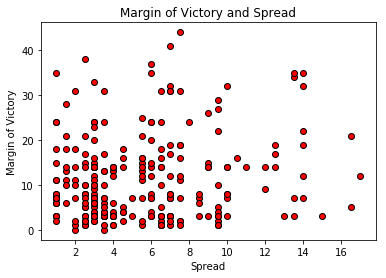

In [53]:
plt.scatter(SPREAD,MGN,marker="o", facecolors="red", edgecolors="black")
#plt.scatter(OFFRNK_L,DEFRNK,marker="^", facecolors="green", edgecolors="black")
plt.title("Margin of Victory and Spread")
plt.xlabel("Spread")
plt.ylabel("Margin of Victory")
plt.savefig("Images/Margin & Spread.png")
plt.show()

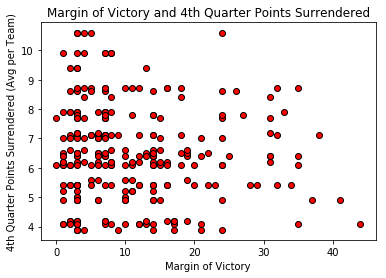

In [54]:
plt.scatter(MGN,Q,marker="o", facecolors="red", edgecolors="black")
plt.title("Margin of Victory and 4th Quarter Points Surrendered")
plt.xlabel("Margin of Victory")
plt.ylabel("4th Quarter Points Surrendered (Avg per Team)")
plt.savefig("Images/Margin & 4th Qtr Points.png")
plt.show()

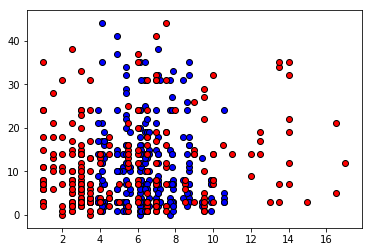

In [55]:
plt.scatter(Q,MGN,marker="o", facecolors="blue", edgecolors="black")
plt.scatter(SPREAD,MGN,marker="o", facecolors="red", edgecolors="black")
plt.savefig("Images/Spread_Margin_Clutch.png")
plt.show()

In [31]:
from collections import Counter

SP_CT = Counter(NFL_EFF6['Spread Winner'])
SP_WN = pd.DataFrame(SP_CT,index=[1])
SP_WN.T

,1
Philadelphia Eagles,8
Miami Dolphins,8
Cleveland Browns,10
New England Patriots,12
Minnesota Vikings,8
Jacksonville Jaguars,5
Tampa Bay Buccaneers,7
Cincinnati Bengals,9
Baltimore Ravens,8
Kansas City Chiefs,10
